# Trainers

In this notebook I test trainer implementations on various environments.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.

INFO:amarl.workers:steps: 3120, last reward: -0.4355999999999999
INFO:amarl.workers:steps: 6160, last reward: -0.4760999999999999
INFO:amarl.workers:steps: 9600, last reward: 0.109
INFO:amarl.workers:steps: 10000, performance: 2332.31695280242steps/s
INFO:amarl.workers:steps: 12960, last reward: 0.2514
INFO:amarl.workers:steps: 16400, last reward: 0.7066000000000003
INFO:amarl.workers:steps: 19760, last reward: 0.7603
INFO:amarl.workers:steps: 20000, performance: 2174.9355241100625steps/s
INFO:amarl.workers:steps: 23200, last reward: 0.9446000000000003
INFO:amarl.workers:steps: 26640, last reward: 0.9570999999999996
INFO:amarl.workers:steps: 30000, performance: 2245.144878162078steps/s
INFO:amarl.workers:steps: 30240, last reward: 1.0274000000000003
INFO:amarl.workers:steps: 33760, last reward: 0.9231
INFO:amarl.workers:steps: 37200, last reward: 1.0191000000000006
INFO:amarl.workers:steps: 40000, performance: 2164.221773826321steps/s
INFO:amarl.workers:steps: 40560, last reward: 1.004

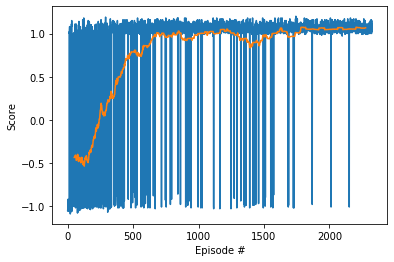

In [3]:
import logging
import amarl
import gym
import numpy as np
from amarl.trainers import A2CTrainer
from amarl.wrappers import RenderedObservation, MultipleEnvs, active_gym, OriginalReturnWrapper, SignReward, \
    TorchObservation, StackFrames


logging.basicConfig(level=logging.INFO)
logging.root.setLevel(logging.INFO)

def moving_average(a, n=3):
    ret = np.cumsum(np.insert(a, 0, 0))
    return (ret[n:] - ret[:-n]) / n


def make_env():
    e = gym.make('CubeCrash-v0')
    e = OriginalReturnWrapper(e)
    e = SignReward(e)
    e = TorchObservation(e)
    e = StackFrames(e, size=4)
    return e

env = MultipleEnvs(make_env, num_envs=16)
with active_gym(env) as env:
    com = A2CTrainer(env, config={'rollout_length': 5, 'device': 'cuda'})
    try:
        amarl.run(com, num_episodes=1000)
    finally:
        import matplotlib.pyplot as plt
        scores = com._worker._final_rewards
        avg_window = 100
        scores_avg = moving_average(scores, avg_window)                    
        fig, ax = plt.subplots()                                                                            
        ax.plot(range(len(scores)), scores)                       
        start = avg_window // 2
        ax.plot(range(start, start + len(scores_avg)), scores_avg)
        plt.ylabel('Score')
        plt.xlabel('Episode #')      
        plt.show()  